In [1]:
# Task1
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.preprocessing import StandardScaler  # For standardizing (scaling) data
from sklearn.metrics import mean_absolute_error, r2_score  # For evaluating the model
import numpy as np  # For numerical operations

In [2]:
# Define the constants for the analysis
# Load the dataset from the CSV file
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\world_food_production.csv")  # Replace with your correct file path
print(df)  # Print the dataset to confirm successful loading

            Entity  Year  Maize Production (tonnes)  \
0      Afghanistan  1961                   700000.0   
1      Afghanistan  1962                   700000.0   
2      Afghanistan  1963                   713000.0   
3      Afghanistan  1964                   720000.0   
4      Afghanistan  1965                   720000.0   
...            ...   ...                        ...   
11907     Zimbabwe  2017                  1532572.0   
11908     Zimbabwe  2018                  1560100.0   
11909     Zimbabwe  2019                   773976.0   
11910     Zimbabwe  2020                  1202347.0   
11911     Zimbabwe  2021                  1469664.0   

       Rice  Production ( tonnes)  Yams  Production (tonnes)  \
0                       319000.00               7.467702e+06   
1                       319000.00               7.420515e+06   
2                       319000.00               8.479074e+06   
3                       380000.00               9.113779e+06   
4                  

In [3]:
# Filter the dataset for Germany and years from 2003 onward
select = df[df["Entity"] == "Germany"]  # Select rows where the country is Germany
select = select[select["Year"] >= 2003]  # Further filter for years >= 2003
print(select.columns)  # Print the columns of the filtered dataset for confirmation

Index(['Entity', 'Year', 'Maize Production (tonnes)',
       'Rice  Production ( tonnes)', 'Yams  Production (tonnes)',
       'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)',
       'Tea  Production ( tonnes )', 'Sweet potatoes  Production (tonnes)',
       'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)',
       'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
       'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)',
       'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)',
       'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)',
       'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)',
       'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)',
       'Apples Production (tonnes)'],
      dtype='object')


In [4]:
# Extract the independent variable (Year) and dependent variable (Production)
x = select["Year"].astype(int)  # Feature: years
y = select["Potatoes  Production (tonnes)"].astype(int)  # Target: potato production values

# Combine the data into a single array for scaling
data = np.column_stack((x, y))  # Combine x (Year) and y (Production) into a 2D array
data

array([[     2003, 151057890],
       [     2004, 148045100],
       [     2005, 163199860],
       [     2006, 154070080],
       [     2007, 142380640],
       [     2008, 150535520],
       [     2009, 156860370],
       [     2010, 155852420],
       [     2011, 139392980],
       [     2012, 152170980],
       [     2013, 134489900],
       [     2014, 141485890],
       [     2015, 143157360],
       [     2016, 145386270],
       [     2017, 125846920],
       [     2018, 128554290],
       [     2019, 132238090],
       [     2020, 137407060],
       [     2021, 138832220]])

In [5]:
# Scale the data to standardize it (mean = 0, standard deviation = 1)
scaler = StandardScaler()  # Initialize the scaler
scaled_data = scaler.fit_transform(data)  # Fit and transform the data
scaled_x, scaled_y = scaled_data[:, 0], scaled_data[:, 1]  # Extract scaled Year and Production
# Explanation: [:, 0] selects all rows of the first column (scaled Year)
#              [:, 1] selects all rows of the second column (scaled Production)

# Train a linear regression model
model = LinearRegression()  # Initialize the linear regression model
model.fit(scaled_x.reshape(-1, 1), scaled_y)  # Fit the model with scaled_x and scaled_y
# Note: reshape(-1, 1) reshapes the 1D array into a 2D array with one column

LinearRegression()

In [6]:
# Make predictions using the trained model
y_pred = model.predict(scaled_x.reshape(-1, 1))  # Predict scaled_y using scaled_x

# Evaluate the model using Mean Absolute Error (MAE) and R² score
mae = mean_absolute_error(scaled_y, y_pred)  # Calculate the MAE
r2 = r2_score(scaled_y, y_pred)  # Calculate the R² score
print("Model Evaluation:")
print(f"MAE: {mae}, R²: {r2}")  # Print evaluation metrics

Model Evaluation:
MAE: 0.6130093009972273, R²: 0.5234431204530777


In [9]:
# Predict potato production for the year 2030
x_new = np.array([2030])  # Define the year 2030 for prediction
x_new_scaled = scaler.transform(np.column_stack((x_new, np.zeros_like(x_new))))[:, 0]  # Scale the new year  
#[:, 0] he It effectively extracts scaled Year (2030) and discards the second column (placeholder for production, which was 0).
#np.zeros_like(x_new):Creates an array of zeros with the same shape as x_new
#Creates an array of zeros with the same shape as x_new
y_pred_new = model.predict(x_new_scaled.reshape(-1, 1))  # Predict scaled production for 2030

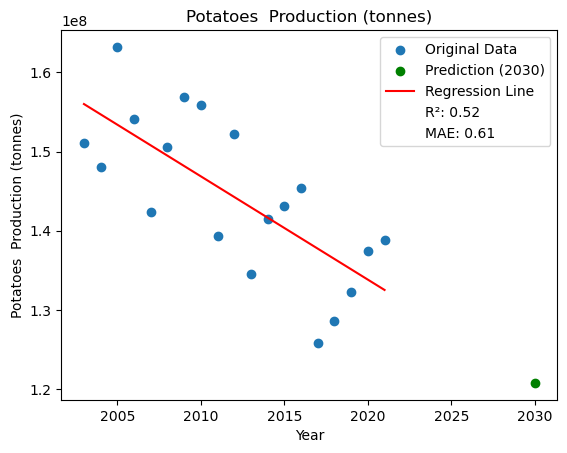

Predicted Potato Production for 2030: 120798941.57894737 tonnes


In [12]:
# Reverse the scaling to get predictions in the original scale
revData = np.column_stack((scaled_x, y_pred))  # Combine scaled_x and predictions
revData = scaler.inverse_transform(revData)  # Reverse the scaling to original units
revX, revY = revData[:, 0], revData[:, 1]  # Extract original Year and Production values

# Reverse scaling for the prediction of 2030
revData_new = np.column_stack((x_new_scaled, y_pred_new))  # Combine scaled new year and prediction
revData_new = scaler.inverse_transform(revData_new)  # Reverse scaling
revY_new = revData_new[:, 1]  # Extract production prediction for 2030

# Plot the data and model results
plt.scatter(x, y, label="Original Data")  # Scatter plot of original data
plt.scatter(x_new, revY_new, label="Prediction (2030)", color="green")  # Plot prediction for 2030
#revY_new is the predicted production value in tonnes (in its original scale).
plt.plot(x, revY, color="red", label="Regression Line")  # Regression line
#x is the Year (original scale), and revY is the predicted production (original scale) for those years.
plt.plot([], [], label=f"R²: {r2:.2f}", ls="")  # Add R² score to the legend,ls="" ensures no line is drawn for this label.
plt.plot([], [], label=f"MAE: {mae:.2f}", ls="")  # Add MAE to the legend ,ls="" ensures no line is drawn for this label.
plt.xlabel("Year")  # Label for x-axis
plt.ylabel("Potatoes  Production (tonnes)")  # Label for y-axis
plt.title("Potatoes  Production (tonnes)")  # Title of the plot
plt.legend()  # Add legend to the plot
plt.show()  # Display the plot

# Print the predicted production for 2030
print(f"Predicted Potato Production for 2030: {revY_new[0]} tonnes")

In [13]:
#Task2
select = df[df["Entity"] == "United States"]  # Filter rows where the country is the United States
select = select[select["Year"] >= 2000]  # Further filter for years greater than or equal to 2000
print(select.columns)  # Print the column names of the filtered dataset
x = select["Year"]  # Extract the independent variable (Year)
y = select["Meat, chicken  Production (tonnes)"]  # Extract the dependent variable (Chicken Production)

Index(['Entity', 'Year', 'Maize Production (tonnes)',
       'Rice  Production ( tonnes)', 'Yams  Production (tonnes)',
       'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)',
       'Tea  Production ( tonnes )', 'Sweet potatoes  Production (tonnes)',
       'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)',
       'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
       'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)',
       'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)',
       'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)',
       'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)',
       'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)',
       'Apples Production (tonnes)'],
      dtype='object')


In [15]:
data = np.column_stack((x, y))  # Combine x (Year) and y (Production) into a 2D array
data

array([[  2000.,  92218.],
       [  2001.,  99141.],
       [  2002., 108968.],
       [  2003., 117274.],
       [  2004., 121917.],
       [  2005., 131185.],
       [  2006., 141524.],
       [  2007., 151886.],
       [  2008., 165406.],
       [  2009., 180675.],
       [  2010., 199267.],
       [  2011., 206330.],
       [  2012., 219742.],
       [  2013., 224349.],
       [  2014., 255794.],
       [  2015., 271382.],
       [  2016., 293384.],
       [  2017., 313087.],
       [  2018., 333559.],
       [  2019., 365355.],
       [  2020., 381591.],
       [  2021., 361499.]])

In [16]:
#Scale the data
scaler = StandardScaler()  # Initialize the StandardScaler
scaled_data = scaler.fit_transform(data)  # Scale both Year and Production
scaled_x, scaled_y = scaled_data[:, 0], scaled_data[:, 1]  # Extract scaled Year and Production

In [17]:
'linear Regression
model = LinearRegression()  # Initialize the linear regression model
model.fit(scaled_x.reshape(-1, 1), scaled_y)  # Train the model with scaled data

LinearRegression()

In [18]:
y_pred = model.predict(scaled_x.reshape(-1, 1))  # Predict scaled production values for the training data

In [19]:
mae = mean_absolute_error(scaled_y, y_pred)  # Calculate the Mean Absolute Error (MAE)
r2 = r2_score(scaled_y, y_pred)  # Calculate the R² score
print(mae, r2)  # Print evaluation metrics

0.1448879380745365 0.9702316673009254


In [20]:
#Scale back
revData = np.column_stack((scaled_x, y_pred))  # Combine scaled_x (Year) and predictions
revData = scaler.inverse_transform(revData)  # Reverse scaling to original units
revX, revY = revData[:, 0], revData[:, 1]  # Extract original Year and Production values

In [21]:
x_new = np.array([2025, 2026, 2027, 2028, 2029, 2030])  # Define new years for prediction
y_new = np.zeros_like(x_new)  # Create placeholder zeros for production values

data_new = np.column_stack((x_new, y_new))  # Combine new years and placeholder production
data_new_scaled = scaler.transform(data_new)  # Scale the new data
x_new_scaled, _ = data_new_scaled[:, 0], data_new_scaled[:, 1]  # Extract scaled new years
y_pred_new = model.predict(x_new_scaled.reshape(-1, 1))  # Predict scaled production for new years

In [22]:
revData_new = np.column_stack((x_new_scaled, y_pred_new))  # Combine scaled years and predictions
revData_new = scaler.inverse_transform(revData_new)  # Reverse scaling to original scale
revY_new = revData_new[:, 1]  # Extract production predictions in original scale

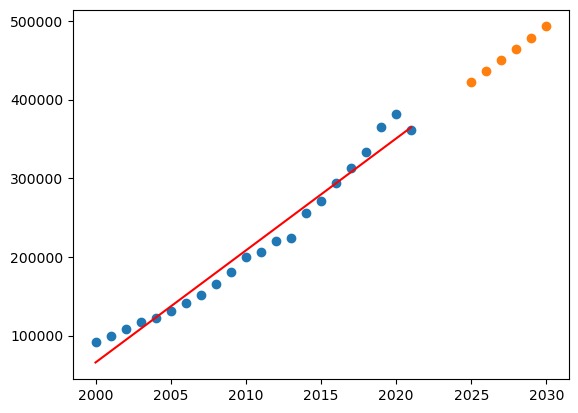

In [23]:
plt.scatter(x, y)  # Scatter plot of original data
plt.scatter(x_new, revY_new)  # Scatter plot of future predictions
plt.plot(x, revY, color="red")  # Regression line
plt.show()  # Display the plot

In [27]:
#task3
# Filter the dataset for Mexico and Maize Production
select = df[df["Entity"] == "Mexico"]  # Filter by country Mexico
x = select["Year"]  # Extract the independent variable (Year)
y = select["Maize Production (tonnes)"]  # Extract the dependent variable (Maize Production)

# Combine the data into a single array for scaling
data = np.column_stack((x, y))  # Combine x (Year) and y (Production) into a 2D array
data[:5]

array([[1.961000e+03, 6.246106e+06],
       [1.962000e+03, 6.337359e+06],
       [1.963000e+03, 6.870201e+06],
       [1.964000e+03, 8.454046e+06],
       [1.965000e+03, 8.936381e+06]])

In [28]:
# Scale the data
scaler = StandardScaler()  # Initialize the scaler
scaled_data = scaler.fit_transform(data)  # Fit and transform the data
scaled_x, scaled_y = scaled_data[:, 0], scaled_data[:, 1]  # Extract scaled Year and Production

In [30]:
from sklearn.svm import SVR
# Train SVR with Linear Kernel
svr_linear = SVR(kernel="linear")  # Initialize SVR with linear kernel
svr_linear.fit(scaled_x.reshape(-1, 1), scaled_y)  # Train the model with scaled data
y_pred_linear = svr_linear.predict(scaled_x.reshape(-1, 1))  # Predict scaled production (linear kernel)

# Train SVR with RBF Kernel
svr_rbf = SVR(kernel="rbf")  # Initialize SVR with RBF kernel
svr_rbf.fit(scaled_x.reshape(-1, 1), scaled_y)  # Train the model with scaled data
y_pred_rbf = svr_rbf.predict(scaled_x.reshape(-1, 1))  # Predict scaled production (RBF kernel)

In [31]:
# Evaluate both models (Linear Kernel)
mae_linear = mean_absolute_error(scaled_y, y_pred_linear)
r2_linear = r2_score(scaled_y, y_pred_linear)
print(f"Linear Kernel - MAE: {mae_linear}, R²: {r2_linear}")
# Evaluate both models (RBF Kernel)
mae_rbf = mean_absolute_error(scaled_y, y_pred_rbf)
r2_rbf = r2_score(scaled_y, y_pred_rbf)
print(f"RBF Kernel - MAE: {mae_rbf}, R²: {r2_rbf}")

Linear Kernel - MAE: 0.2159064209130577, R²: 0.9236633266685075
RBF Kernel - MAE: 0.19223522435822574, R²: 0.9416895816777537


In [32]:
# Reverse scaling for training predictions (Linear Kernel)
revData_linear = np.column_stack((scaled_x, y_pred_linear))  # Combine scaled_x and predictions
revData_linear = scaler.inverse_transform(revData_linear)  # Reverse scaling
revX_linear, revY_linear = revData_linear[:, 0], revData_linear[:, 1]  # Extract Year and Production

# Reverse scaling for training predictions (RBF Kernel)
revData_rbf = np.column_stack((scaled_x, y_pred_rbf))  # Combine scaled_x and predictions
revData_rbf = scaler.inverse_transform(revData_rbf)  # Reverse scaling
revX_rbf, revY_rbf = revData_rbf[:, 0], revData_rbf[:, 1]  # Extract Year and Production

In [33]:
# Forecast maize production for 2025–2030 using both models
x_new = np.array([2025, 2026, 2027, 2028, 2029, 2030])  # Define new years for prediction
y_new = np.zeros_like(x_new)  # Create placeholder zeros for production values
data_new = np.column_stack((x_new, y_new))  # Combine new years and placeholder production
data_new_scaled = scaler.transform(data_new)  # Scale the new data
x_new_scaled, _ = data_new_scaled[:, 0], data_new_scaled[:, 1]  # Extract scaled new years

# Predict future production (Linear Kernel)
y_pred_new_linear = svr_linear.predict(x_new_scaled.reshape(-1, 1))
revData_new_linear = np.column_stack((x_new_scaled, y_pred_new_linear))  # Combine scaled years and predictions
revData_new_linear = scaler.inverse_transform(revData_new_linear)  # Reverse scaling
revY_new_linear = revData_new_linear[:, 1]  # Extract future predictions

# Predict future production (RBF Kernel)
y_pred_new_rbf = svr_rbf.predict(x_new_scaled.reshape(-1, 1))
revData_new_rbf = np.column_stack((x_new_scaled, y_pred_new_rbf))  # Combine scaled years and predictions
revData_new_rbf = scaler.inverse_transform(revData_new_rbf)  # Reverse scaling
revY_new_rbf = revData_new_rbf[:, 1]  # Extract future predictions

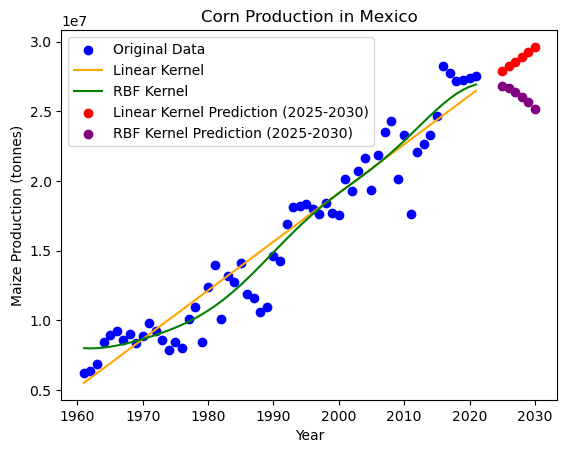

In [34]:
# Plot the original data and predictions
plt.scatter(x, y, label="Original Data", color="blue")  # Scatter plot of original data
plt.plot(revX_linear, revY_linear, label="Linear Kernel", color="orange")  # Linear Kernel Regression Line
plt.plot(revX_rbf, revY_rbf, label="RBF Kernel", color="green")  # RBF Kernel Regression Line
plt.scatter(x_new, revY_new_linear, label="Linear Kernel Prediction (2025-2030)", color="red")  # Linear predictions
plt.scatter(x_new, revY_new_rbf, label="RBF Kernel Prediction (2025-2030)", color="purple")  # RBF predictions
plt.xlabel("Year")
plt.ylabel("Maize Production (tonnes)")
plt.title("Corn Production in Mexico")
plt.legend()
plt.show()

#task 4
Margin Maximization in SVM: SVM maximizes the margin (distance between hyperplane and closest data points) to improve generalization 
while penalizing misclassifications.
Hyperparameter C:
Low C: Prioritizes a larger margin and tolerates misclassifications (better generalization).
High C: Focuses on classifying training data correctly but risks overfitting.
Effect: C balances the trade-off between maximizing margin and minimizing classification errors.
#task5
Clustering: Groups similar data points into clusters (e.g., k-Means).
Dimension Reduction: Reduces features while preserving key information (e.g., PCA).
Combination:
Use PCA to reduce dimensions, then apply k-Means to cluster simplified data.
Example: PCA reduces a 50-feature customer dataset to 2 dimensions, followed by k-Means clustering for customer segmentation.
This improves accuracy, speed, and visualization.